# Flight Price Prediction

## Project Overview

## Latar Belakang

Industri penerbangan merupakan salah satu sektor transportasi yang sangat dinamis, di mana harga tiket pesawat dapat berubah-ubah tergantung pada berbagai faktor seperti maskapai, waktu keberangkatan, durasi penerbangan, jumlah transit, dan musim perjalanan. Variasi harga yang signifikan seringkali membuat penumpang kesulitan untuk menentukan waktu terbaik dan maskapai yang paling sesuai dengan anggaran mereka.

Bagi perusahaan (maskapai maupun agen perjalanan online/OTA), kemampuan untuk memprediksi harga tiket pesawat secara akurat sangat penting. Hal ini memungkinkan perusahaan untuk:

- Menetapkan harga yang kompetitif.

- Menawarkan rekomendasi harga terbaik kepada pelanggan.

- Mengoptimalkan strategi pemasaran dan promosi.

## Masalah yang Ingin Diselesaikan

Bagaimana cara membangun model machine learning yang mampu memprediksi harga tiket pesawat berdasarkan variabel-variabel yang tersedia dalam dataset (misalnya maskapai, rute, durasi penerbangan, jumlah transit, tanggal keberangkatan, dll)

## Tujuan Bisnis

**Bagi Penumpang (Customer-Centric Value):**

- Membantu calon penumpang memperkirakan harga tiket sehingga mereka dapat merencanakan perjalanan dengan lebih baik.

- Memberikan rekomendasi maskapai dan waktu pemesanan yang lebih efisien.

Bagi Maskapai/OTA (Business-Centric Value):

- Mendukung penetapan harga dinamis (dynamic pricing) agar lebih kompetitif.

- Meningkatkan customer engagement dengan transparansi harga.

- Mengurangi risiko kehilangan pelanggan akibat harga yang terlalu tinggi.

## Data Overview

The various features of the cleaned dataset are explained below:
- Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
- Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
- Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
- Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
- Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
- Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
- Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
- Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
- Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
- Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
- Price: Target variable stores information of the ticket price.

## Data Wrangling

### 2.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

### 2.2 Load Dataset

In [ ]:
data = pd.read_csv('/content/flight_dataset.csv', sep =',')

In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### 2.3 Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.shape

(300153, 12)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.00,150076.00,86646.85,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.00,12.22,7.19,0.83,6.83,11.25,16.17,49.83
days_left,300153.00,26.00,13.56,1.00,15.00,26.00,38.00,49.00
price,300153.00,20889.66,22697.77,1105.00,4783.00,7425.00,42521.00,123071.00


In [ ]:
data.describe(include='object').T


,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


### 2.4 Data Inspection

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
data.duplicated().sum()

np.int64(0)

The data is quiet cleaned, there is no missing values and no duplicates row

In [ ]:
# Menghapus kolom yang tidak relevan
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

In [ ]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


tipe datanya sudah benar jadi tidak perlu tranform data

### 2.5 EDA

#### 2.5.1 Univariate

In [ ]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
data['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
data['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [ ]:
data['price'].value_counts()

,count
price,
54608,1445
2339,1442
54684,1390
60978,1383
60508,1230
...,...
10767,1
10946,1
12206,1


In [ ]:
data['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
data['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
data['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [ ]:
data['stops'].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
data['days_left'].value_counts()

,count
days_left,
25,6633
18,6602
39,6593
32,6585
26,6573
24,6542
19,6537
31,6534
33,6532


In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Numerikal Kolom
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['duration', 'days_left', 'price'], dtype='object')

In [ ]:
# Kategorikal Kolom
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

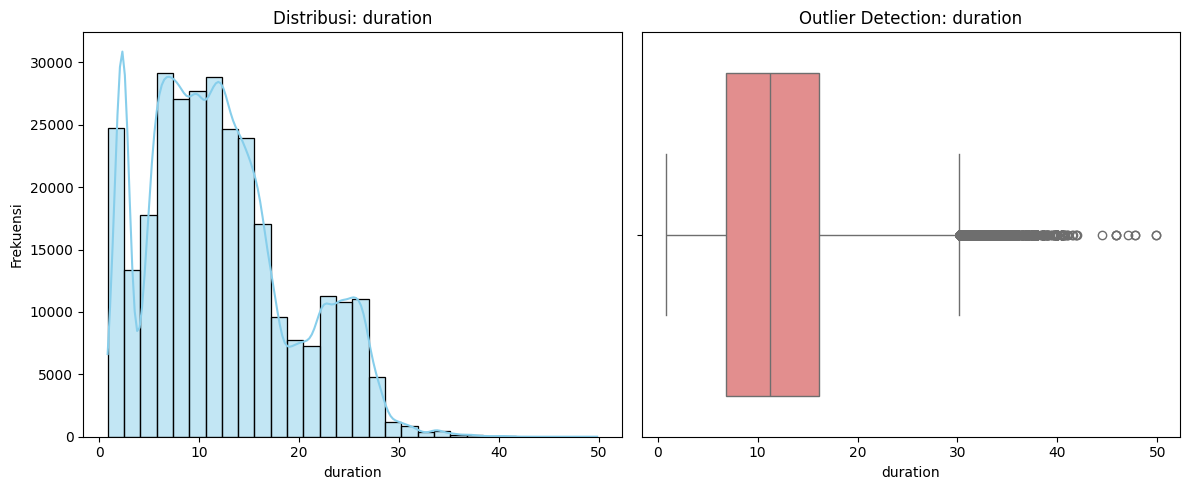

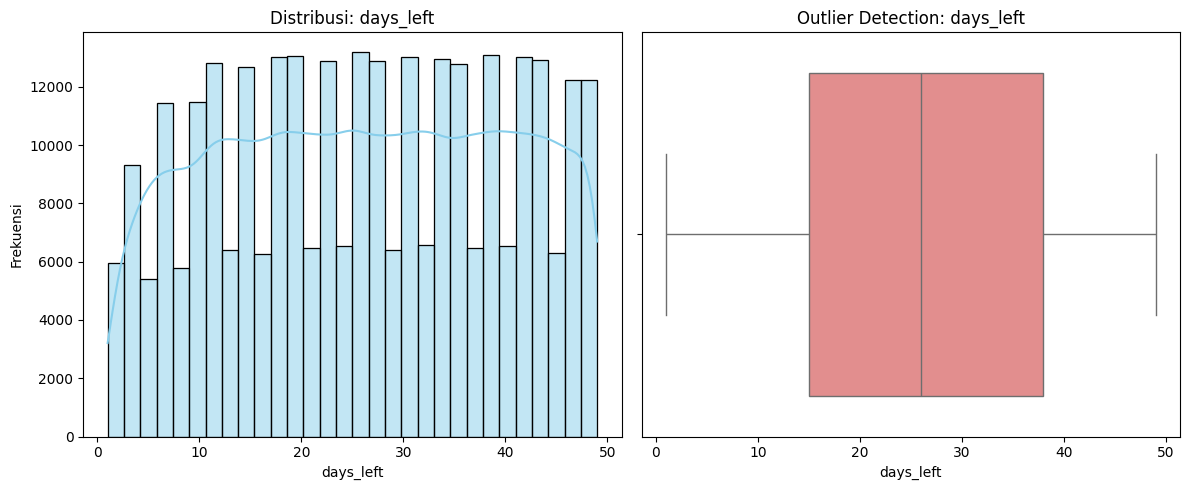

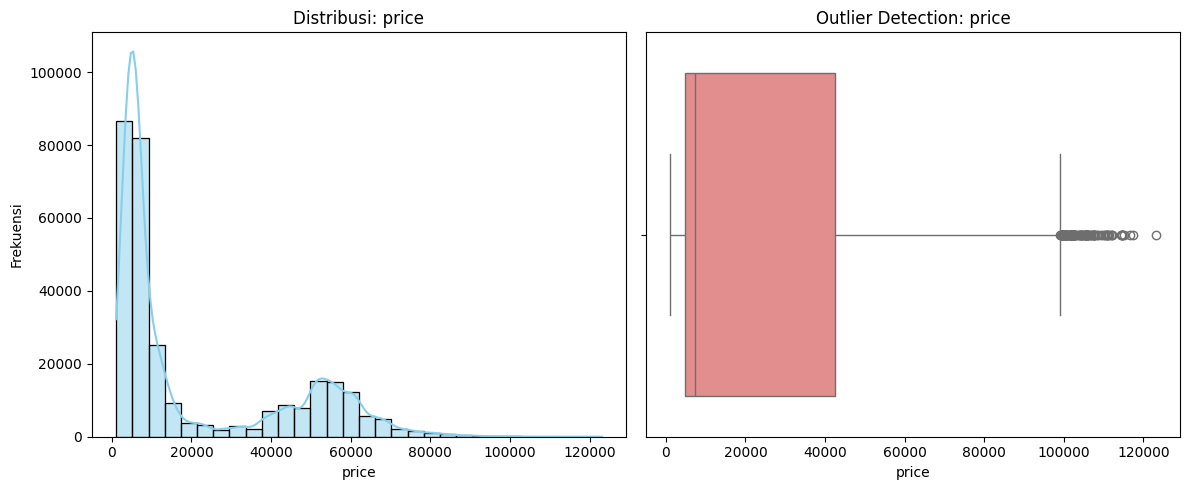

In [ ]:
# Menampilkan distribusi data dan boxplot menggunakan looping
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram / distribusi data
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Boxplot untuk deteksi outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Outlier Detection: {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


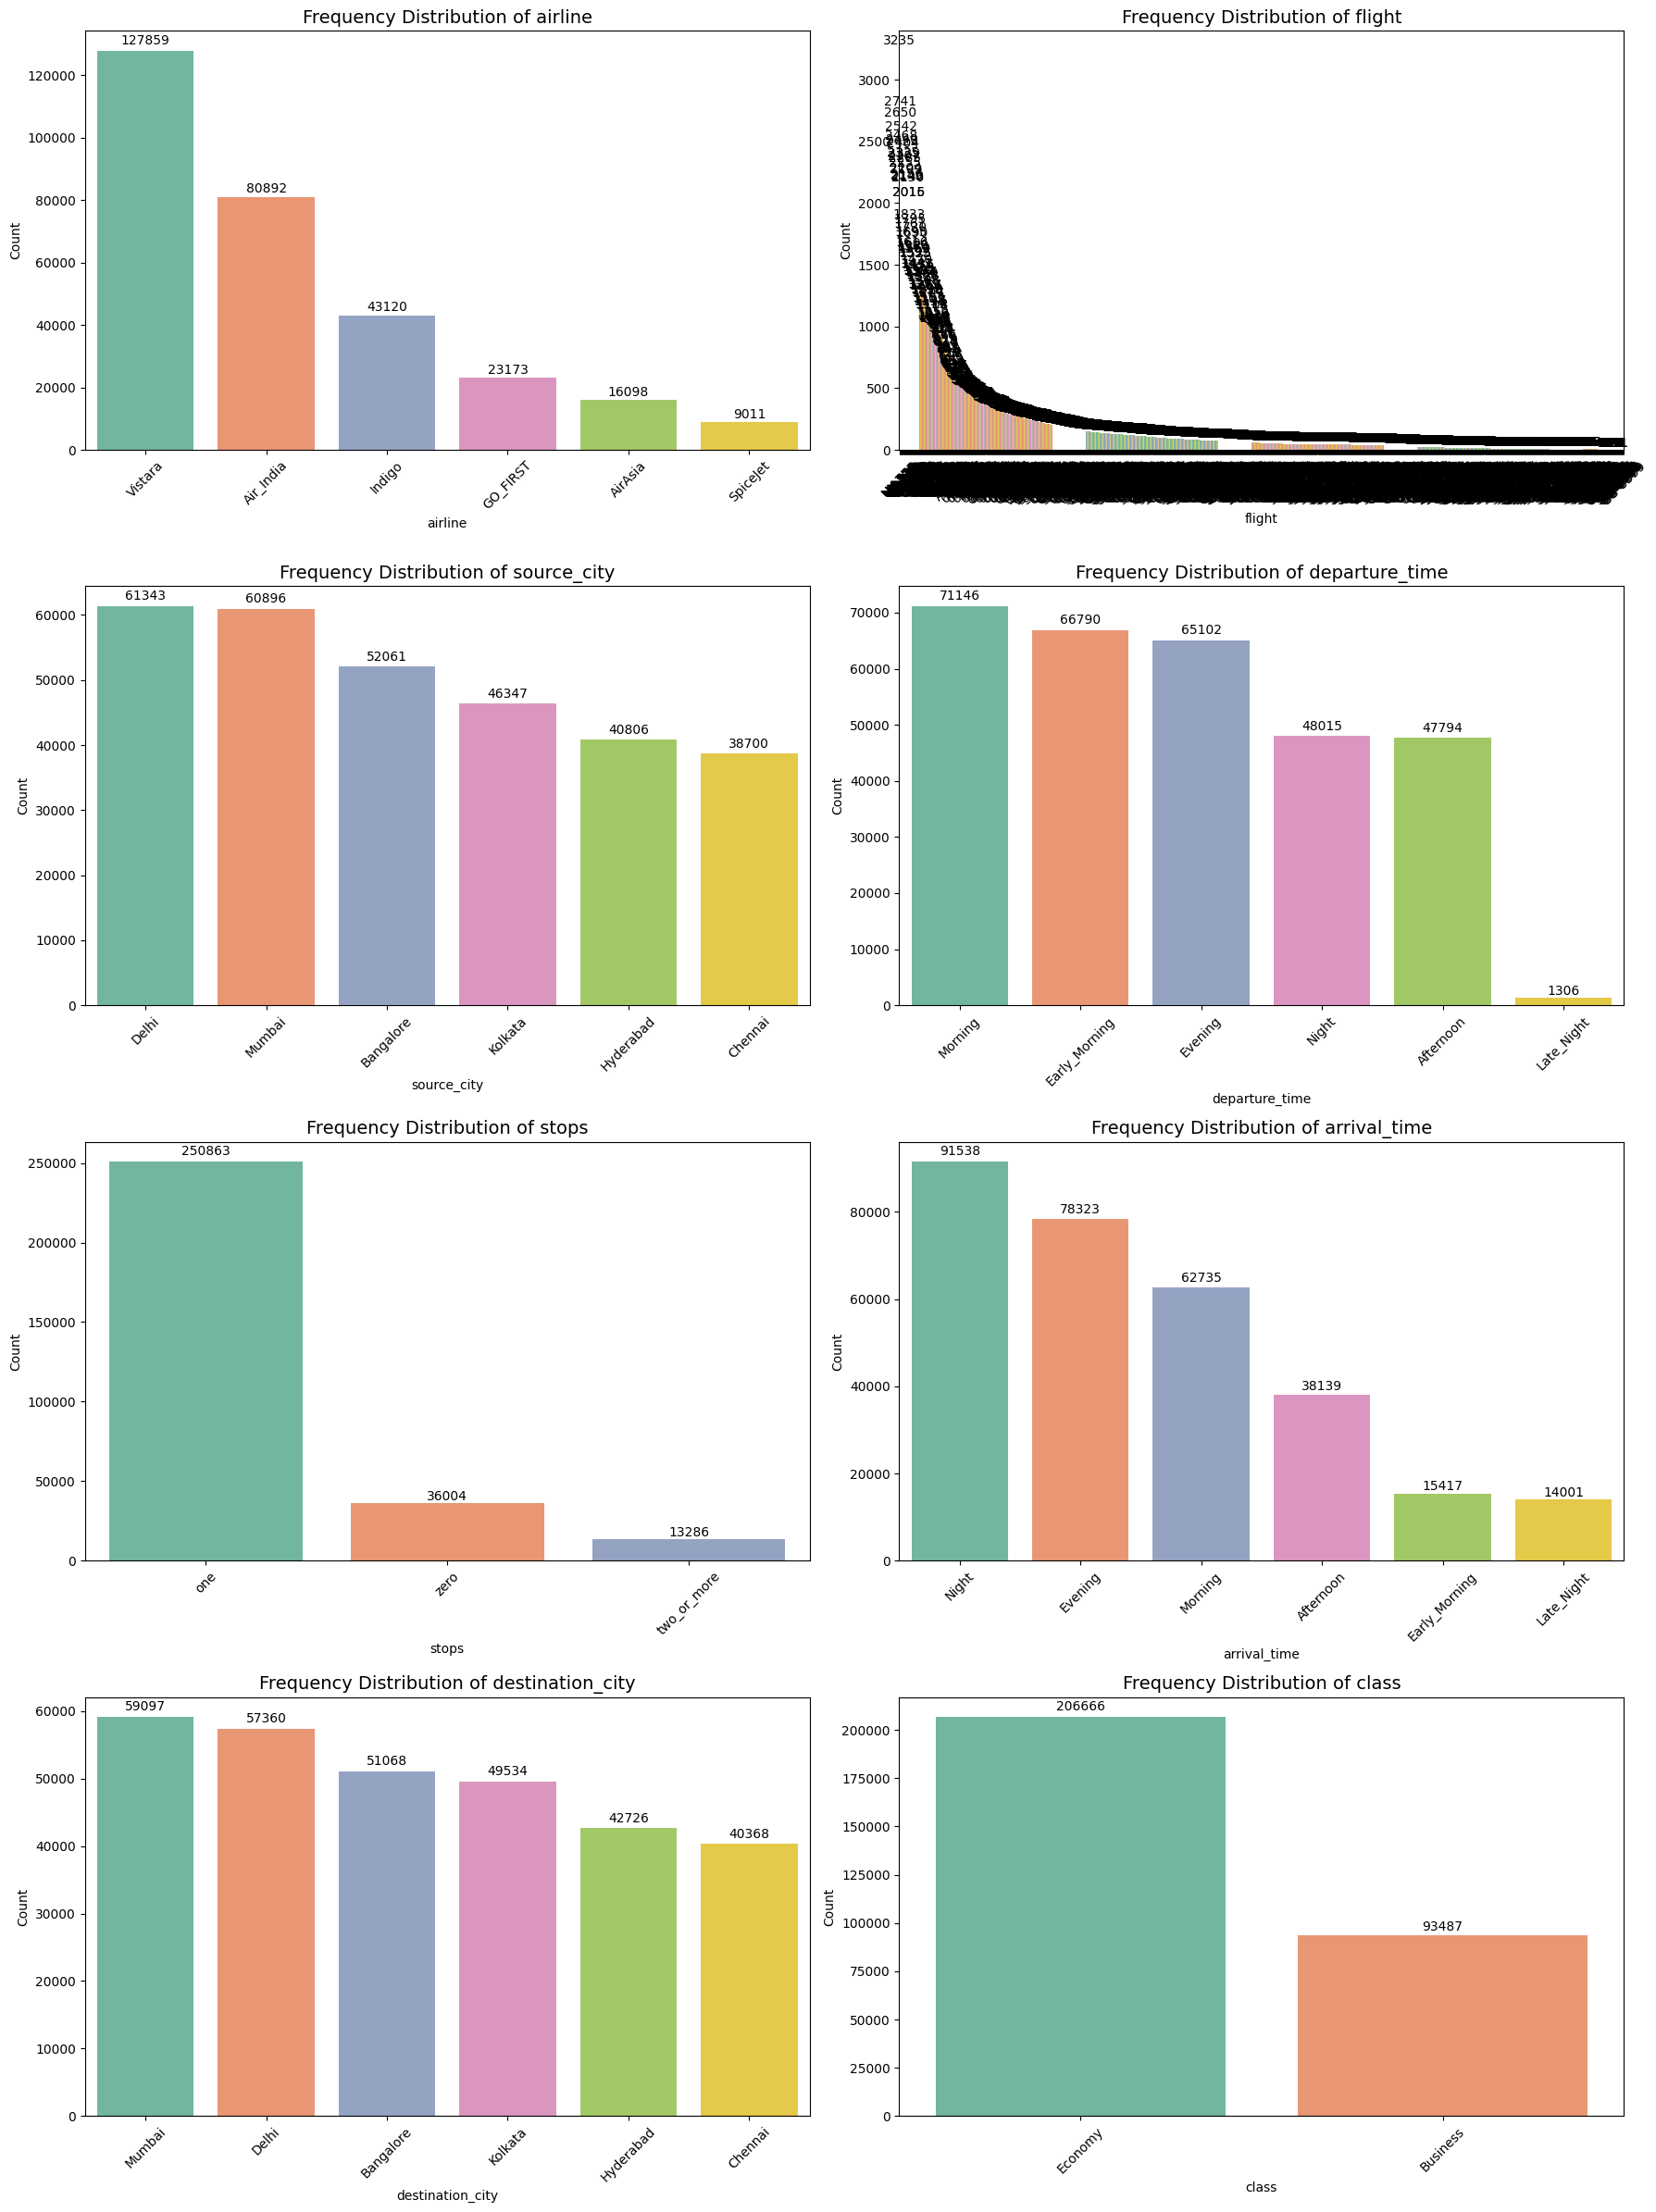

In [ ]:
# Menampilkan distribusi data pada kolom kategorikal
# Mengatur ukuran figure berdasarkan jumlah kolom
n = len(categorical_cols)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(18, 6*((n+1)//2)))
axes = axes.flatten()

# looping untuk setiap variabel kategorikal
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i], palette="Set2", order=data[col].value_counts().index)
    axes[i].set_title(f"Frequency Distribution of {col}", fontsize=14)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

    # Menambahkan angka di atas bar
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            height + (0.01 * height),
            f'{int(height)}',
            ha="center", va="bottom", fontsize=10
        )

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Airline**

- Vistara mendominasi dengan 127k penerbangan, jauh lebih tinggi dibanding maskapai lain.
- SpiceJet sangat kecil volumenya (9k saja), artinya kontribusi datanya relatif minor.


**Source City**

- Delhi (65k), Mumbai (61k), dan Bangalore (52k) adalah 3 kota dengan penerbangan terbanyak → ini kemungkinan hub utama.
- Chennai (38k) paling sedikit → bisa jadi market lebih kecil atau data yang terbatas.
- Distribusi cukup merata, tidak ada kota yang ekstrem mendominasi.

**Destination City**

- Mumbai & Delhi adalah hub penerbangan utama → paling banyak menjadi tujuan.
- Bangalore, Hyderabad, Chennai juga kuat karena faktor bisnis & teknologi.
- Distribusi menunjukkan semua kota besar India adalah destinasi utama, tapi ada perbedaan volume karena peran ekonominya.

**Class (Ekonomi vs Bisnis)**

- Dari grafik, kelas Ekonomi jauh lebih dominan dibanding Bisnis.
- Hal ini sesuai realita: mayoritas penumpang memilih tiket ekonomis.

#### 2.5.2 Bivariate

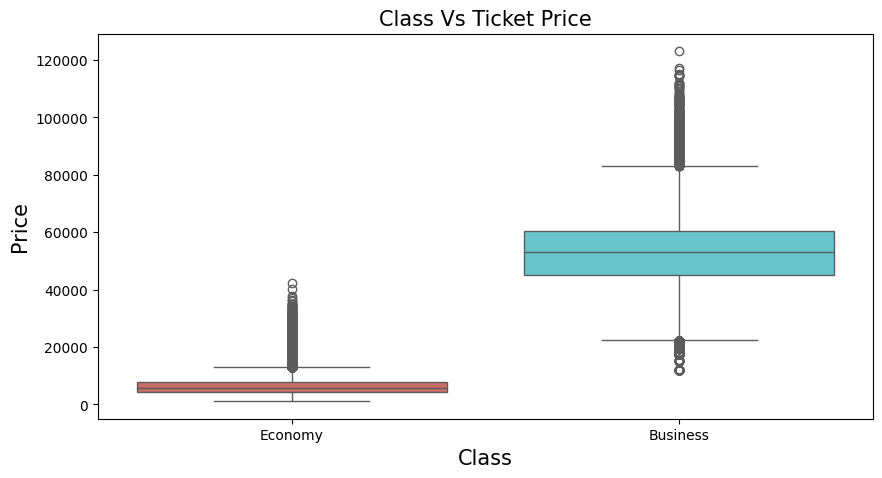

In [ ]:
# Class vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=data,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Ekonomi Class**
- Distribusi harga normal berkisar 5.000 – 15.000.
- Outlier muncul penyebabnya
    - Rute jarak jauh (duration tinggi, >10 jam).
    - Penerbangan dengan maskapai premium meski masih kategori Economy (contoh pernerbangan vistara)
    - Pemesanan mendekati keberangkatan (days_left rendah).

**Business Class**

- Distribusi harga normal berada di 40.000 – 80.000.
- Outlier ekstrem di atas 100.000 (maksimum 123.071) yang penyebanya:
  - Semua berasal dari Vistara Airlines (Premium Airlines)
  - Durasi penerbangan panjang (long-haul ~15 jam).
  - Pemesanan rata-rata hanya 8 hari sebelum keberangkatan (last-minute).

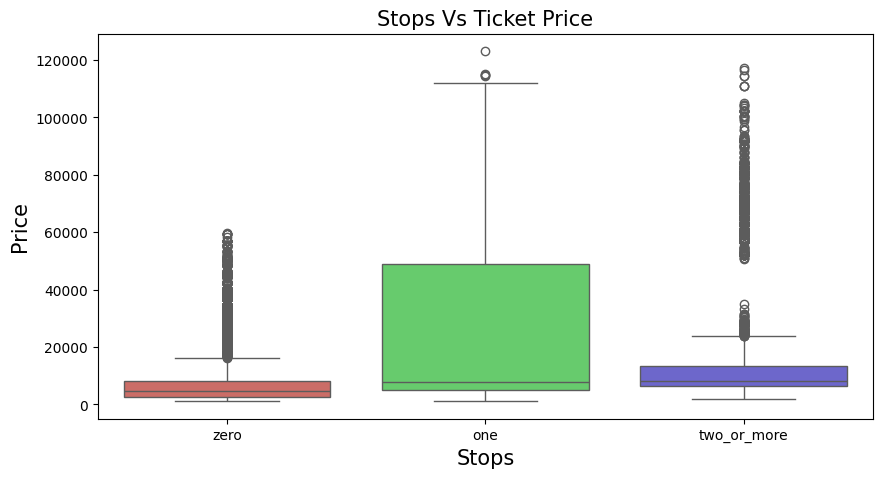

In [ ]:
# Stops vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Zero Stop**
- Penerbangan direct cenderung lebih murah tapi ada outlier
    - Direct long-haul flight (misalnya >10 jam).
    - Biasanya Business Class.

**One Stop**
- Harga bervariatif (range harga lumayan bervariasi)
- terdapat outlier harga
    - Transit dengan maskapai premium.
    - Business Class dengan pemesanan mepet

**Two stops**
- Penerbangan dengan dua atau lebih stop berada di tengah, tidak selalu lebih mahal, kemungkinan karena maskapai menawarkan harga lebih kompetitif walaupun durasi perjalanan lebih lama.
- terdapat outlier
    - Kombinasi maskapai berbeda (premium + long-haul).
    - Business Class dengan rute panjang.

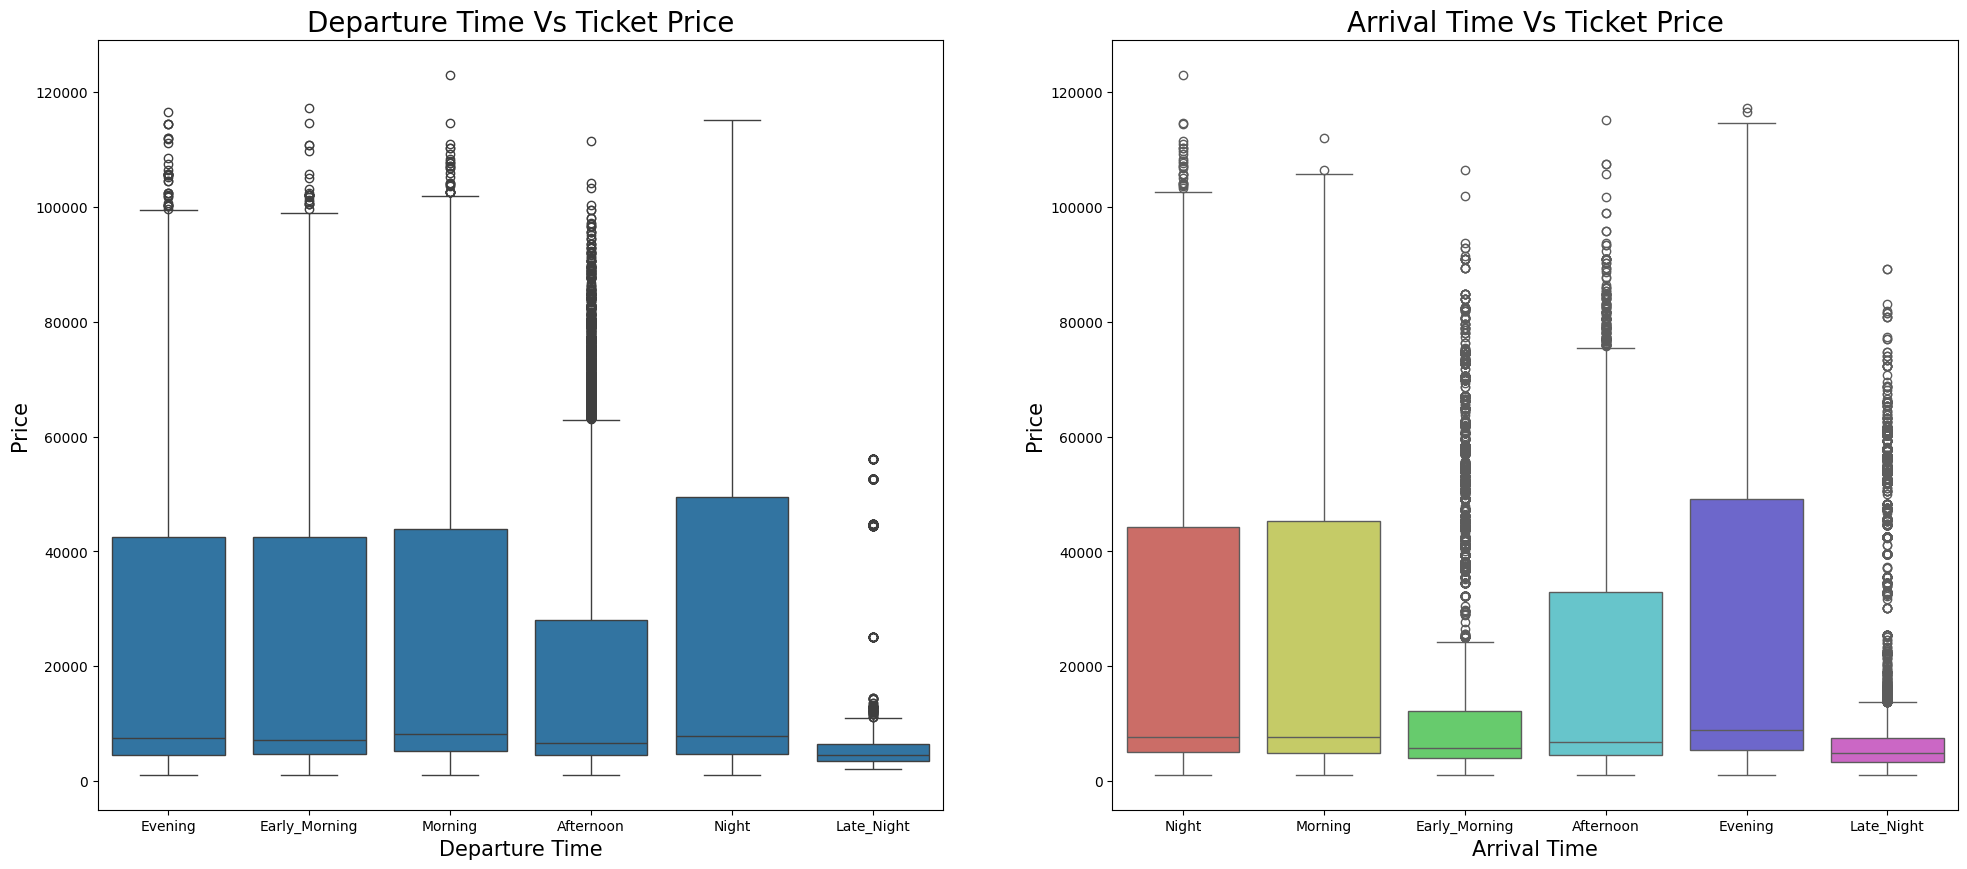

In [ ]:
# Departure Time vs Ticket Price
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

# Arrival Time vs Ticket Price
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Departure Time Vs Ticket Price**

- Harga Tiket lebih mahal untuk penerbangan dengan waktu keberangkatan malam (night)
- Harga tiket hampir sama untuk keberangkatan  Early_morning , Morning and Evening
- Harga tiket lebih rendah/murah untuk waktu keberangkatan Late_night

**Arrival Time Vs Ticket Price**
- Harga tiket lebih mahal untuk kedatangan penerbanngan di waktu Evening
- Harga tiket hampir sama untuk kedatangan penerbangan di waktu Morning and Night
- Harga tiket lebih renda/murah untuk waktu kedatangan adalah Late_night

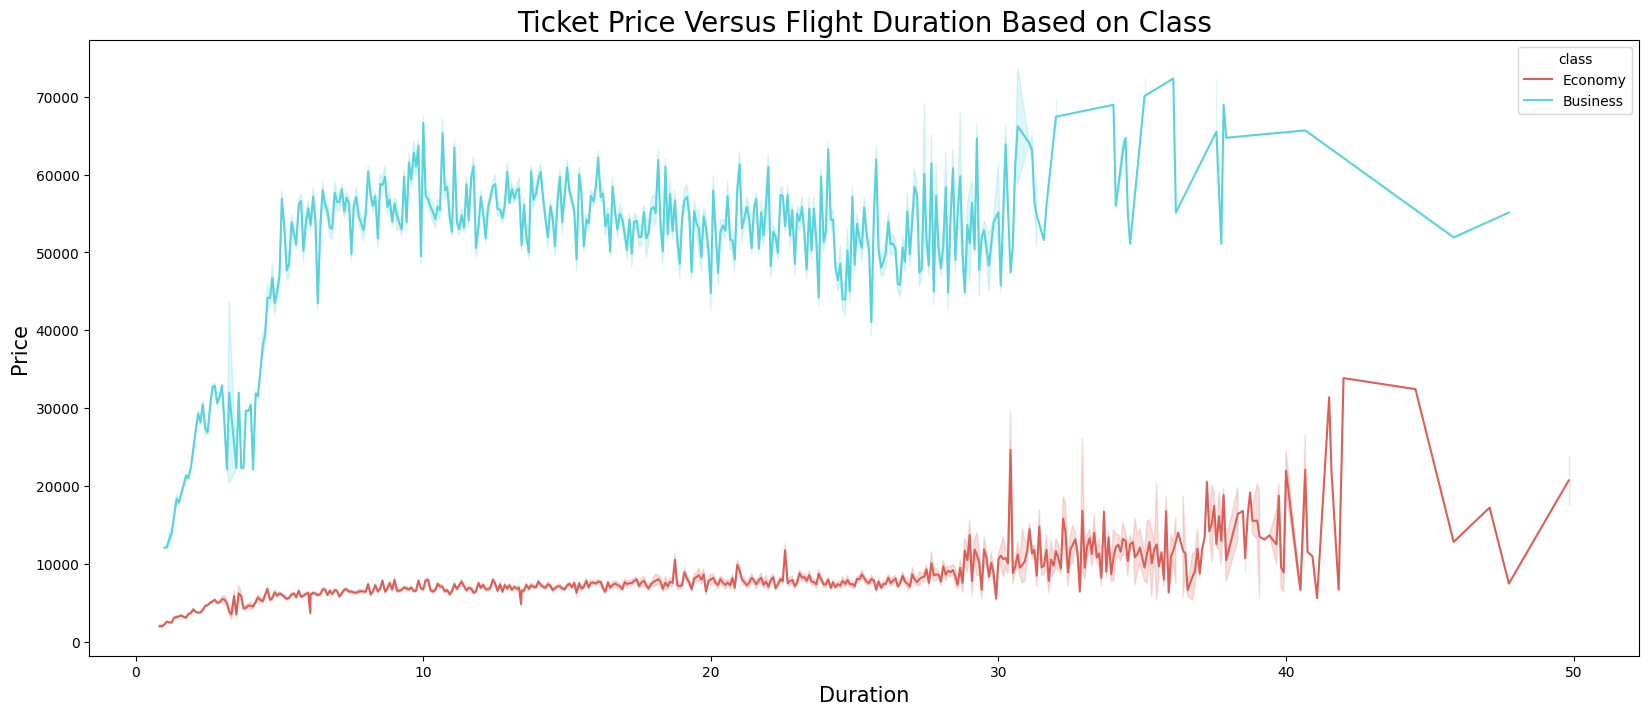

In [ ]:
# Price vs Class
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Semakin lama durasinya maka harganya semakin tinggi baik di kelas bisnis ataupun ekonomi

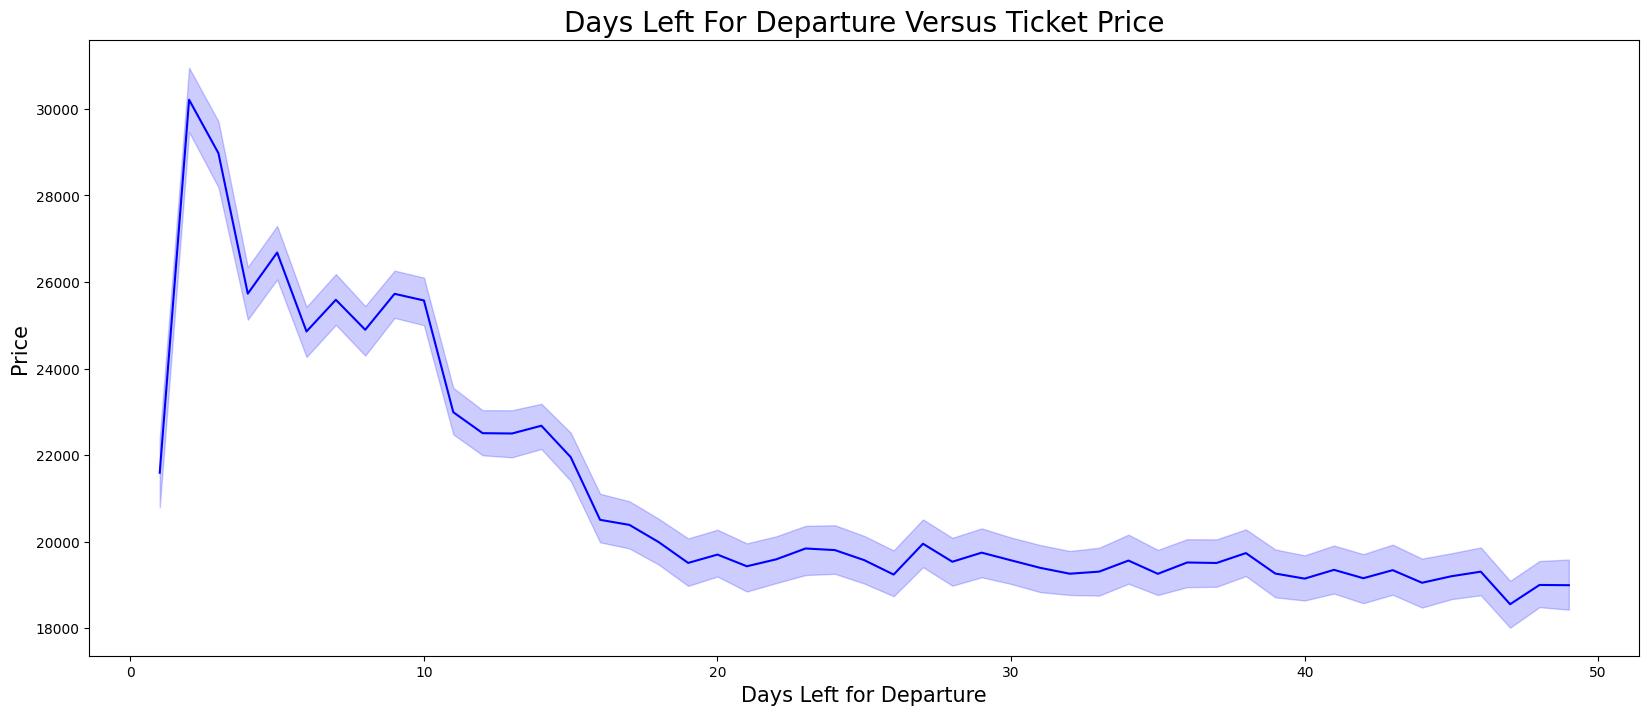

In [ ]:
# Days Left for Departure vs Price
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Harga tiket semakin mahal apabila mendekati hari keberangkatan dan lebih murah apabila di booked jauh-jauh hari

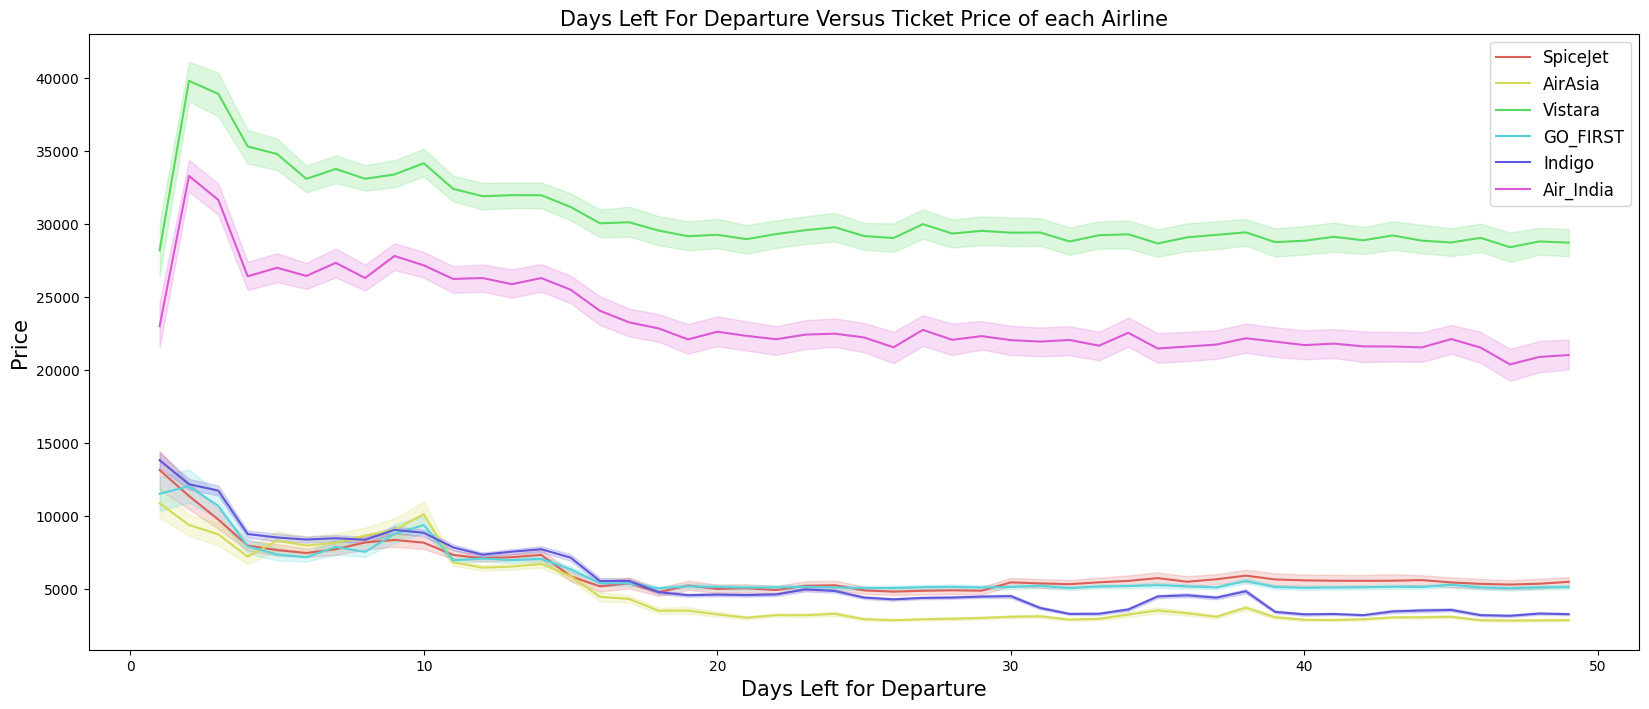

In [ ]:
# Days Left for Departure vs Price vs Airlines
plt.figure(figsize=(20,8))
sns.lineplot(data=data,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Pola umum (semua maskapai)**
- Harga tiket cenderung sangat tinggi saat mendekati tanggal keberangkatan (0–2 hari sebelum berangkat).
- Harga semakin murah jika dipesan lebih awal (lebih dari 20–30 hari sebelum keberangkatan).
- Pola ini wajar karena maskapai menggunakan dynamic pricing: mendekati hari keberangkatan, kursi tersisa lebih sedikit → harga melonjak.

**Maskapai Premium (Vistara & Air India)**
- Harga konsisten jauh lebih tinggi daripada maskapai lain.
- Vistara: rata-rata harga di kisaran 30.000–40.000 meski dipesan jauh hari.
- Air India: rata-rata 20.000–30.000, lebih murah dari Vistara tapi tetap premium.

**Outlier tinggi sering muncul di last-minute booking → Business Class long-haul flight.**

- Maskapai Budget (SpiceJet, AirAsia, Go First, IndiGo)
- Harga rata-rata lebih rendah (4.000–10.000) jika dipesan jauh hari.
- Kenaikan drastis terjadi hanya pada 1–3 hari sebelum keberangkatan.
- IndiGo dan AirAsia terlihat paling konsisten menjaga harga tetap rendah.

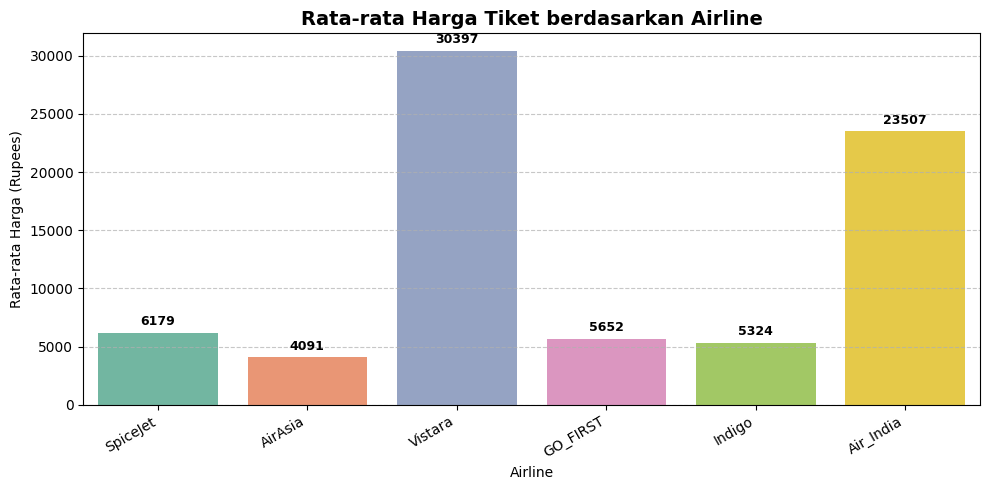

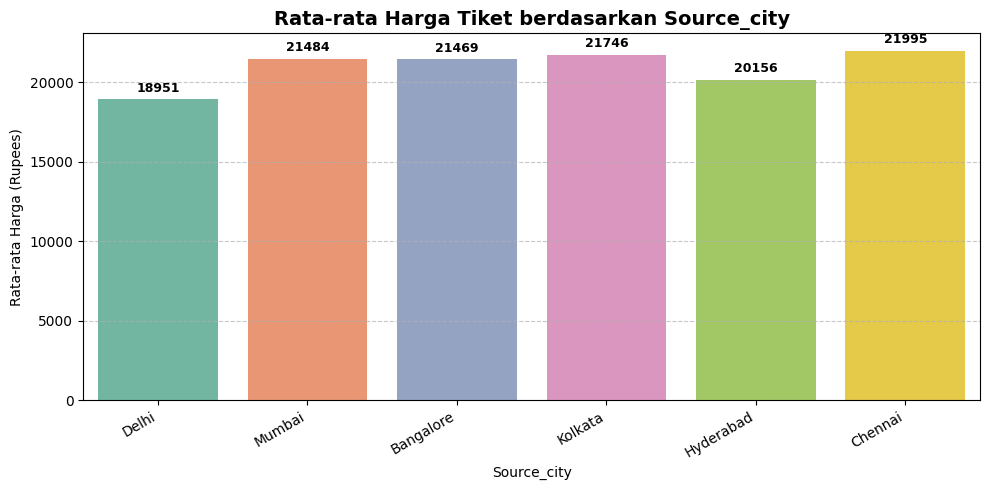

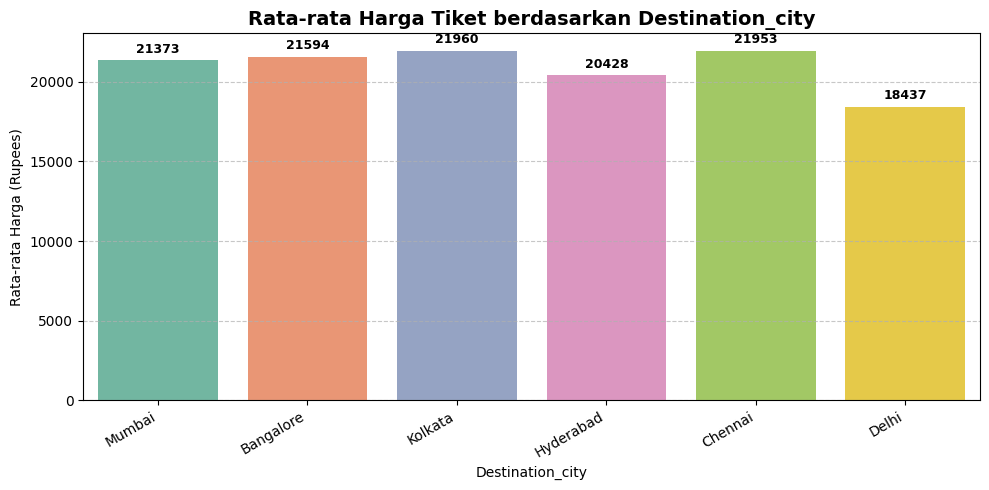

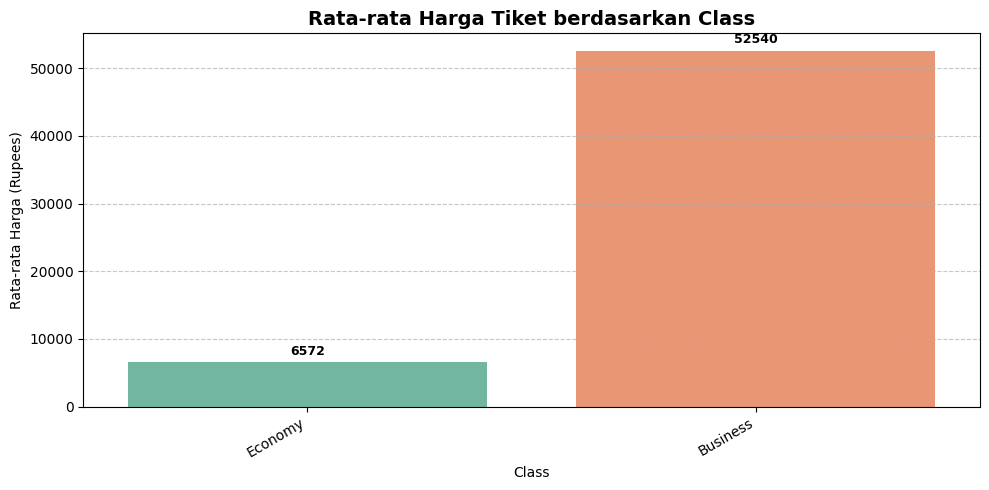

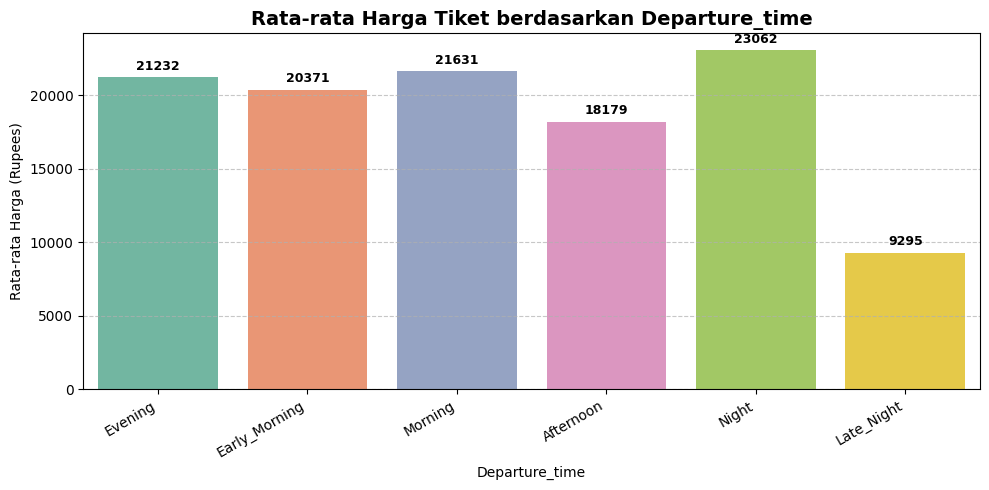

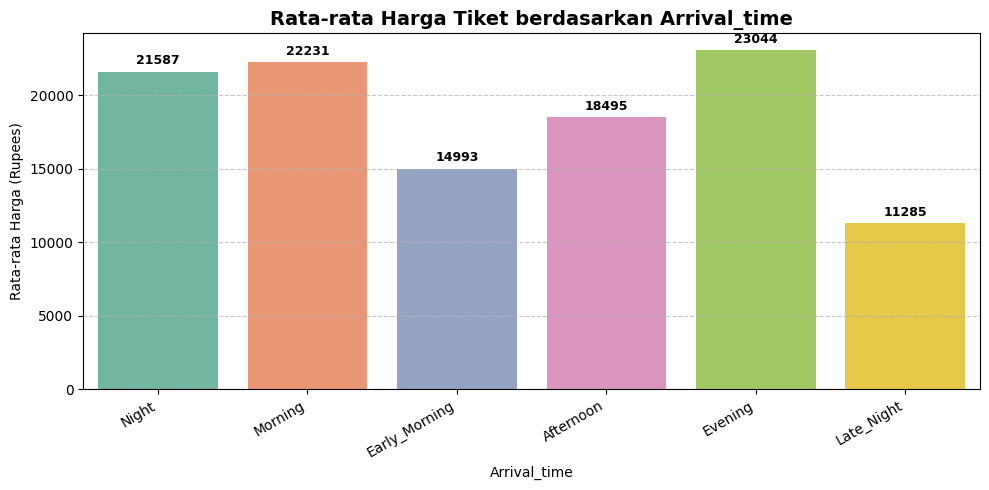

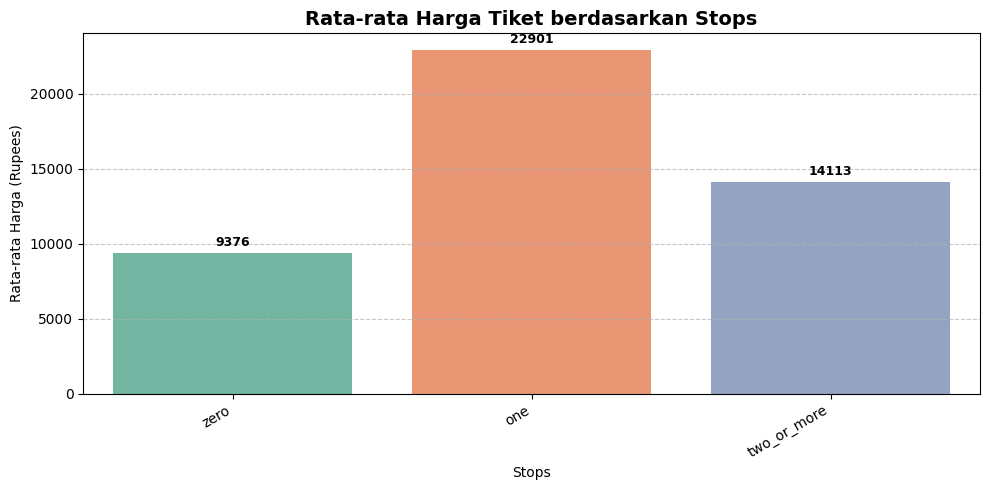

In [ ]:

categorical_features = ['airline', 'source_city', 'destination_city', 'class', 'departure_time', 'arrival_time', 'stops']

# Looping untuk setiap kategori
for col in categorical_features:
    plt.figure(figsize=(10,5))

    # Barplot rata-rata harga
    ax = sns.barplot(
        x=col,
        y='price',
        data=data,
        ci=None,
        palette="Set2",
        estimator=lambda x: x.mean()
    )

    # Tambahkan angka di atas bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),   # angka dibulatkan
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center',
            xytext = (0, 8), textcoords = 'offset points',
            fontsize=9, color="black", weight="bold"
        )

    # Layout
    plt.title(f'Rata-rata Harga Tiket berdasarkan {col.capitalize()}', fontsize=14, weight="bold")
    plt.ylabel("Rata-rata Harga (Rupees)")
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Data Preprocessing

### 3.1 Data Splitting


In [ ]:
# Memisahkan fitur & target
X = data.drop(["flight","price"], axis=1)
y = data["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240122 entries, 148417 to 121958
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240122 non-null  object 
 1   source_city       240122 non-null  object 
 2   departure_time    240122 non-null  object 
 3   stops             240122 non-null  object 
 4   arrival_time      240122 non-null  object 
 5   destination_city  240122 non-null  object 
 6   class             240122 non-null  object 
 7   duration          240122 non-null  float64
 8   days_left         240122 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 18.3+ MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60031 entries, 27131 to 287693
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           60031 non-null  object 
 1   source_city       60031 non-null  object 
 2   departure_time    60031 non-null  object 
 3   stops             60031 non-null  object 
 4   arrival_time      60031 non-null  object 
 5   destination_city  60031 non-null  object 
 6   class             60031 non-null  object 
 7   duration          60031 non-null  float64
 8   days_left         60031 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 4.6+ MB


In [ ]:
y_train.value_counts()

,count
price,
2339,1160
54608,1139
60978,1124
54684,1109
60508,1004
...,...
15835,1
15244,1
11392,1


In [ ]:
y_test.value_counts()


,count
price,
54608,306
2339,282
54684,281
60978,259
5955,248
...,...
71901,1
69356,1
99403,1


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240122, 9), (60031, 9), (240122,), (60031,))

### 3.2 Outlier Handling
Tidak dilakukan outlier handling pada project ini  karena harga yang outlier  masih masuk akal yang disebabkan oleh beberapa faktor.

### 3.3 Feature Selection

In [ ]:
X_train.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,240122.00,12.21,7.19,0.83,6.75,11.25,16.17,49.83
days_left,240122.00,26.01,13.57,1.00,15.00,26.00,38.00,49.00


In [ ]:
X_train.describe(include='object').T

,count,unique,top,freq
airline,240122,6,Vistara,102452
source_city,240122,6,Delhi,49067
departure_time,240122,6,Morning,57137
stops,240122,3,one,200570
arrival_time,240122,6,Night,73438
destination_city,240122,6,Mumbai,47309
class,240122,2,Economy,165350


### 3.4 Feature Encoding



In [ ]:
X_train['class'] = X_train['class'].map({'Economy': 0, 'Business': 1})
X_test['class'] = X_test['class'].map({'Economy': 0, 'Business': 1})

- Saya pakai manual mapping untuk class karena ini fitur ordinal. Economy lebih murah dari Business, jadi perlu representasi angka yang mencerminkan urutan harganya.

In [ ]:
categorical_cols_ohe = ['airline', 'source_city', 'departure_time',
                        'stops', 'arrival_time', 'destination_city']


In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit & transform di train
ohe_train_array = ohe.fit_transform(X_train[categorical_cols_ohe])
ohe_train_df = pd.DataFrame(ohe_train_array,
                            columns=ohe.get_feature_names_out(categorical_cols_ohe),
                            index=X_train.index)

# Transform di test
ohe_test_array = ohe.transform(X_test[categorical_cols_ohe])
ohe_test_df = pd.DataFrame(ohe_test_array,
                           columns=ohe.get_feature_names_out(categorical_cols_ohe),
                           index=X_test.index)


- Saya pakai One-Hot Encoding karena fitur kategorikal seperti airline, kota, atau waktu tidak memiliki urutan alami. Dengan OHE, setiap kategori direpresentasikan sebagai variabel biner tanpa memberi kesan ada ranking antar kategori

In [ ]:
# Menggabungkan kembali
X_train = pd.concat([X_train.drop(columns=categorical_cols_ohe), ohe_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols_ohe), ohe_test_df], axis=1)


In [ ]:
X_train.head()

,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
148417,0,19.42,6,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
36879,0,7.00,13,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
274531,1,21.17,44,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
166397,0,10.25,11,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
272722,1,26.50,5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00


In [ ]:
X_test.head()

,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
27131,0,19.75,40,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
266857,1,9.83,42,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
141228,0,10.50,41,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
288329,1,14.50,14,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
97334,0,8.25,20,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


## Model Building & Evaluation

### 4.1 Linear Regression

In [ ]:
# Baseline Model (Linear Regression)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi Train & Test
y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print("=== Train Performance ===")
print("MAE :", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2  :", r2_score(y_train, y_pred_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train))

=== Train Performance ===
MAE : 4573.984544095776
RMSE: 6752.135295432478
R2  : 0.9114925780739281
MAPE: 0.46569973751779037


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print("=== Test Performance ===")
print("MAE :", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R2  :", r2_score(y_test, y_pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_test))


=== Test Performance ===
MAE : 4553.2878167821955
RMSE: 6761.7135222016095
R2  : 0.9113048651706634
MAPE: 0.46242207478027963


- MAE = 4.553 Rupees ( Rp865 ribu) artinya rata-rata kesalahan prediksi harga tiket hampir 900 ribu rupiah.

- RMSE = 6.762 Rupees (Rp1,285 juta) artinya kesalahan prediksi yang besar bisa mencapai sekitar 1,3 juta rupiah.

- R² (91,1%) artinya model masih cukup bagus karena bisa menjelaskan sekitar 91% variasi harga tiket.

- MAPE (46%) artinya rata-rata kesalahan prediksi cukup tinggi, hampir setengah dari harga tiket aslinya.

### 4.2 Decision Tree

In [ ]:
# Decision Tree
# Inisialisasi model
dt_model = DecisionTreeRegressor(random_state=1000)

# Latih model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [ ]:
# Prediksi Train & Test
y_pred_train = dt_model.predict(X_train)
y_pred_test  = dt_model.predict(X_test)

In [ ]:
# Evaluasi Data Train
print("=== Train Performance ===")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2:", r2_score(y_train, y_pred_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train))


=== Train Performance ===
MAE: 58.31496489284614
RMSE: 606.2042246101416
R2: 0.9992865963348827
MAPE: 0.00266993395019527


In [ ]:
# Evaluasi Data Test
print("=== Test Performance ===")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R2:", r2_score(y_test, y_pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_test))


=== Test Performance ===
MAE: 1184.0747502679174
RMSE: 3553.831833159405
R2: 0.975499214335855
MAPE: 0.0752033413564413


- MAE = 1184.07 rupees (Rp 213.000) artinya rata-rata prediksi meleset sekitar Rp 213 ribu.

- RMSE = 3553.83 rupees (Rp 640.000) artinya untuk beberapa kasus, melesetnya bisa sampai rata-rata Rp 640 ribu.

- R² = 97.55% model menjelaskan 97,5% variasi harga tiket, sangat bagus.

- MAPE = 7.52% artinya rata-rata kesalahan prediksi sekitar 7,5% dari harga tiket asli.
  - Misalnya harga tiket Rp 3,6 jutarata-rata salahnya sekitar Rp 270 ribu.

### 4.3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Buat model Random Forest untuk regresi
model_rf = RandomForestRegressor(random_state=1000)

# Training
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [ ]:
# Prediksi Train & Test
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf  = model_rf.predict(X_test)


In [ ]:
# Evaluasi Data Train
print("=== Train Performance (Random Forest) ===")
print("MAE :", mean_absolute_error(y_train, y_pred_train_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print("R2  :", r2_score(y_train, y_pred_train_rf))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train_rf))

=== Train Performance (Random Forest) ===
MAE : 421.7241023829797
RMSE: 1133.6776369872955
R2  : 0.997504965365827
MAPE: 0.02725419175311484


In [ ]:
# Evaluasi Data Test
print("=== Test Performance (Random Forest) ===")
print("MAE :", mean_absolute_error(y_test, y_pred_test_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
print("R2  :", r2_score(y_test, y_pred_test_rf))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_test_rf))


=== Test Performance (Random Forest) ===
MAE : 1084.9629890280896
RMSE: 2796.1953429024366
R2  : 0.9848322458471026
MAPE: 0.07073434002650951


- MAE = 1.085 Rupees (Rp206 ribu) artinya rata-rata prediksi harga tiket meleset sekitar dua ratus ribuan rupiah.

- RMSE = 2.796 (Rp531 ribu) artinya kalau ada prediksi yang meleset cukup jauh, rata-rata salahnya sekitar lima ratus ribuan rupiah.

- R² (98,5%) artinya model ini sangat bagus karena mampu menjelaskan hampir semua variasi harga tiket.

- MAPE (7%) artinya rata-rata kesalahan prediksi hanya sekitar 7% dari harga tiket aslinya.
    - Tiket 10,000 Rupees (Rp.1.800.000) → rata-rata salah sekitar 700 Rupees (≈ Rp136 ribu).
    - Tiket 5,000 Rupees (Rp 900.000) → rata-rata salah sekitar 350 Rupees (≈ Rp68 ribu)

- Jadi, model Random Forest yang dibuat sudah sangat akurat.
Contoh: kalau tiket sebenarnya Rp3 juta, model biasanya menebak di kisaran Rp2,8 juta – Rp3,2 juta.

### 4.4 XGBoost

In [ ]:
# Inisialisasi model
model_xgb = XGBRegressor(random_state = 1000)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Prediksi Train & Test
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb  = model_xgb.predict(X_test)

In [ ]:
# Evaluasi Data Train
print("=== Train Performance (XGBoost) ===")
print("MAE :", mean_absolute_error(y_train, y_pred_train_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print("R2  :", r2_score(y_train, y_pred_train_xgb))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_train_xgb))

=== Train Performance (XGBoost) ===
MAE : 1965.1939697265625
RMSE: 3409.8686191699526
R2  : 0.9774278402328491
MAPE: 0.1458728015422821


In [ ]:
# Evaluasi Data Test
print("\n=== Test Performance (XGBoost) ===")
print("MAE :", mean_absolute_error(y_test, y_pred_test_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("R2  :", r2_score(y_test, y_pred_test_xgb))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_test_xgb))


=== Test Performance (XGBoost) ===
MAE : 2027.4197998046875
RMSE: 3548.414011921382
R2  : 0.9755738377571106
MAPE: 0.14850784838199615


- MAE = 2.027 Rupees (±384.000 Rupiah) artinya rata-rata prediksi model meleset sekitar 384 ribu Rupiah dari nilai sebenarnya.

- RMSE = 3.548 Rupees (±674.000 Rupiah) artinya kalau ada prediksi yang sangat meleset, error bisa sekitar 674 ribu Rupiah.

- R² = 0,976 artinya model ini menjelaskan 97,6% data dengan baik, yang berarti prediksinya cukup akurat.

- MAPE = 14,9% artinya rata-rata prediksi model melenceng sekitar 15% dari nilai asli.

- Kesimpulan: Prediksi XGBoost ini cukup akurat, biasanya meleset ±384 ribu Rupiah, dan untuk kasus ekstrem bisa meleset sampai ±674 ribu Rupiah, dengan rata-rata kesalahan persentase sekitar 15%.

### 4.5 LightBM

In [ ]:
# Inisialisasi model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Latih model
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 30
[LightGBM] [Info] Start training from score 20888.572417


LGBMRegressor(random_state=42)

In [ ]:
# Prediksi
y_train_pred_lgbm = lgbm_model.predict(X_train)
y_test_pred_lgbm = lgbm_model.predict(X_test)

In [ ]:
# Evaluasi Data Train
print("\n=== Train Performance (LightGBM) ===")
print("MAE :", mean_absolute_error(y_train, y_train_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm)))
print("R2  :", r2_score(y_train, y_train_pred_lgbm))
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_pred_lgbm))



=== Train Performance (LightGBM) ===
MAE : 2322.240632461003
RMSE: 3882.2277847282776
R2  : 0.9707410022256989
MAPE: 0.1809624400570637


In [ ]:
# Evaluasi Data Test
print("\n=== Test Performance (LightGBM) ===")
print("MAE :", mean_absolute_error(y_test, y_test_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm)))
print("R2  :", r2_score(y_test, y_test_pred_lgbm))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred_lgbm))


=== Test Performance (LightGBM) ===
MAE : 2348.9267686255635
RMSE: 3958.3542050569795
R2  : 0.9696040604767783
MAPE: 0.18072547286484847


- MAE = 2.349 Rupees (±446.000 Rupiah) artinya rata-rata prediksi model meleset sekitar 446 ribu Rupiah dari nilai sebenarnya.

- RMSE = 3.958 Rupees ( ±751.000 Rupiah) artinya jika ada prediksi yang sangat meleset, error bisa sekitar 751 ribu Rupiah.

- R² = 0,970 asrtinya model ini menjelaskan 97% data dengan baik, artinya prediksi cukup akurat.

- MAPE = 0,181 (18,1%) artinya rata-rata prediksi model melenceng sekitar 18% dari nilai asli.

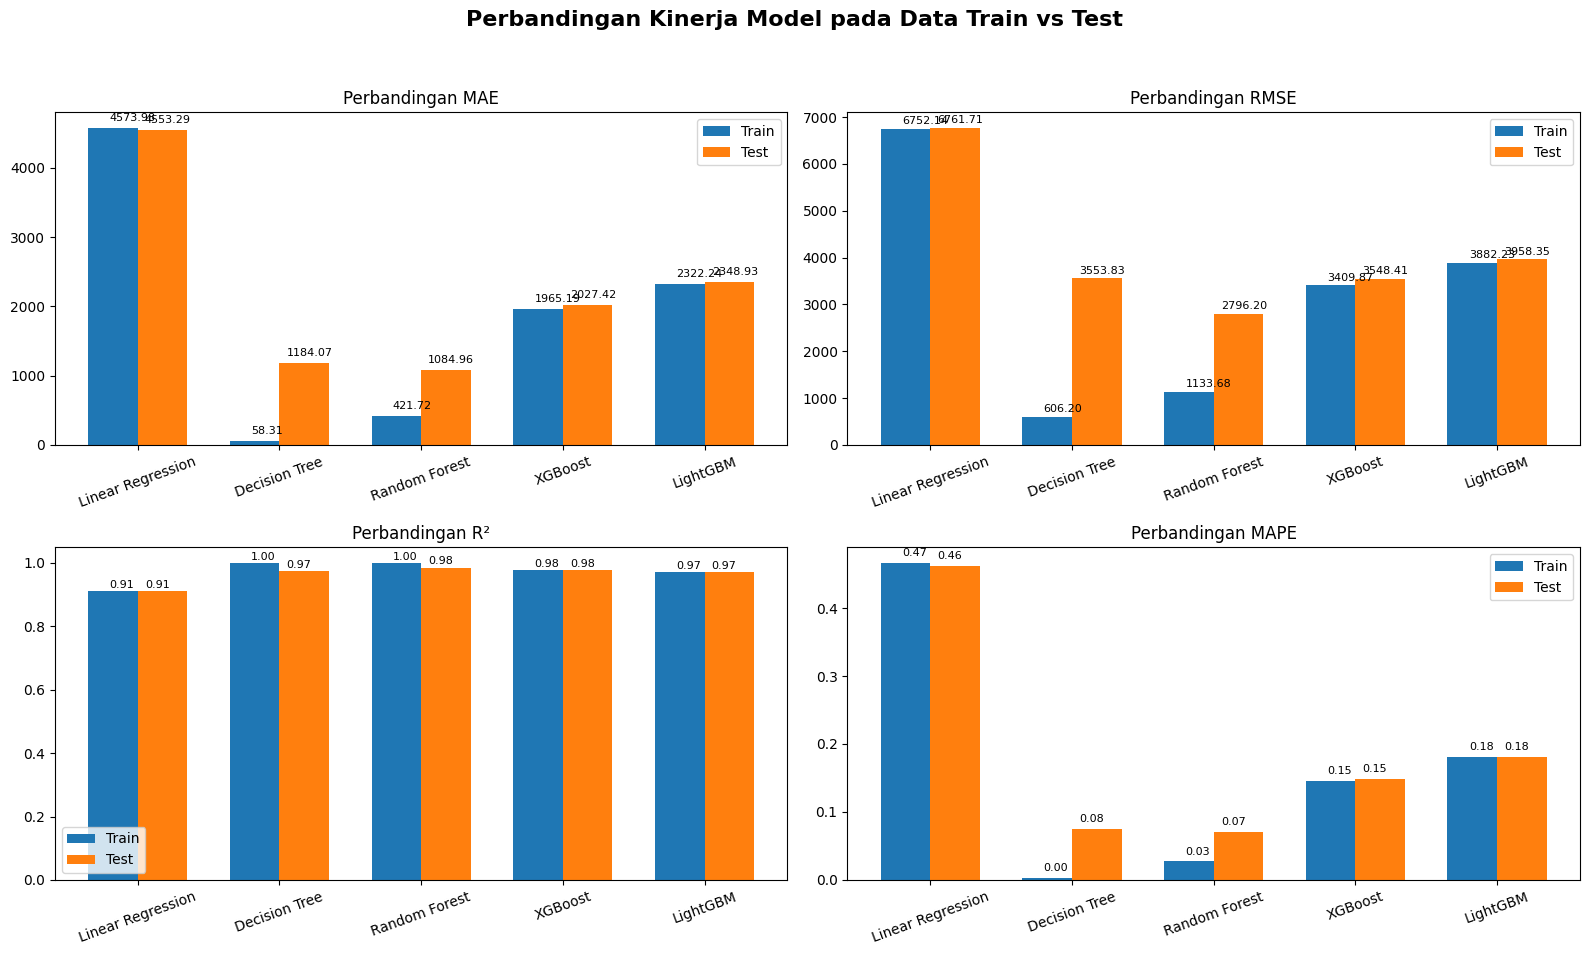

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data hasil evaluasi (Train dan Test)
models = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"]

mae_train = [4573.98, 58.31, 421.72, 1965.19, 2322.24]
mae_test  = [4553.29, 1184.07, 1084.96, 2027.42, 2348.93]

rmse_train = [6752.14, 606.20, 1133.68, 3409.87, 3882.23]
rmse_test  = [6761.71, 3553.83, 2796.20, 3548.41, 3958.35]

r2_train = [0.911, 0.999, 0.998, 0.977, 0.971]
r2_test  = [0.911, 0.975, 0.985, 0.976, 0.970]

mape_train = [0.466, 0.0027, 0.0273, 0.146, 0.181]
mape_test  = [0.462, 0.0752, 0.0707, 0.149, 0.181]

# Plotting
x = np.arange(len(models))
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Perbandingan Kinerja Model pada Data Train vs Test", fontsize=16, fontweight="bold")

# MAE
axs[0, 0].bar(x - width/2, mae_train, width, label='Train')
axs[0, 0].bar(x + width/2, mae_test, width, label='Test')
axs[0, 0].set_title("Perbandingan MAE")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models, rotation=20)
axs[0, 0].legend()
for i, v in enumerate(mae_train):
    axs[0, 0].text(i - 0.2, v + 100, f"{v:.2f}", fontsize=8)
for i, v in enumerate(mae_test):
    axs[0, 0].text(i + 0.05, v + 100, f"{v:.2f}", fontsize=8)

# RMSE
axs[0, 1].bar(x - width/2, rmse_train, width, label='Train')
axs[0, 1].bar(x + width/2, rmse_test, width, label='Test')
axs[0, 1].set_title("Perbandingan RMSE")
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models, rotation=20)
axs[0, 1].legend()
for i, v in enumerate(rmse_train):
    axs[0, 1].text(i - 0.2, v + 100, f"{v:.2f}", fontsize=8)
for i, v in enumerate(rmse_test):
    axs[0, 1].text(i + 0.05, v + 100, f"{v:.2f}", fontsize=8)

# R²
axs[1, 0].bar(x - width/2, r2_train, width, label='Train')
axs[1, 0].bar(x + width/2, r2_test, width, label='Test')
axs[1, 0].set_title("Perbandingan R²")
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models, rotation=20)
axs[1, 0].legend()
for i, v in enumerate(r2_train):
    axs[1, 0].text(i - 0.2, v + 0.01, f"{v:.2f}", fontsize=8)
for i, v in enumerate(r2_test):
    axs[1, 0].text(i + 0.05, v + 0.01, f"{v:.2f}", fontsize=8)

# MAPE
axs[1, 1].bar(x - width/2, mape_train, width, label='Train')
axs[1, 1].bar(x + width/2, mape_test, width, label='Test')
axs[1, 1].set_title("Perbandingan MAPE")
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models, rotation=20)
axs[1, 1].legend()
for i, v in enumerate(mape_train):
    axs[1, 1].text(i - 0.2, v + 0.01, f"{v:.2f}", fontsize=8)
for i, v in enumerate(mape_test):
    axs[1, 1].text(i + 0.05, v + 0.01, f"{v:.2f}", fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**MAE VS RMSE**
- Decision Tree memberikan prediksi yang akurat di train namun error melonjak di test sehingga bisa mengindikasikan overfitting.
- Linear Regression, XGBoost, LightGBM, MAE dan RMSE lebih konsisten, namun error lebih tinggi dibanding Random Forest.
- Random Forest dipilih sebagai model paling optimal, karena memberikan prediksi dengan error rata-rata terkecil (MAE rendah) sekaligus menjaga kestabilan terhadap error besar (RMSE rendah).

**R2 VS MAPE**
- Decision Tree menunjukkan R² sangat tinggi di train namun sedikit menurun di test, sementara MAPE meningkat.
- Linear Regression, XGBoost, dan LightGBM konsisten, namun R² lebih rendah atau MAPE lebih tinggi dibanding Random Forest.
- Random Forest dipilih sebagai model paling optimal, karena mampu menjaga R² tetap tinggi sekaligus mempertahankan MAPE yang rendah dan stabil pada train maupun test.

## Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model dasar
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_dist = {
    'n_estimators': [100, 150, 200],   # jumlah pohon
    'max_depth': [10, 15, None],       # membatasi kedalaman
    'min_samples_split': [2, 5, 10],   # minimal sample untuk split
    'min_samples_leaf': [1, 2, 4],     # minimal sample di daun
    'max_features': ['sqrt']           # subset fitur untuk split
}

In [ ]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,              # 10 kombinasi
    cv=3,                   # 3-fold CV
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Training
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
# Model terbaik
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
# Evaluasi pada Train set
y_train_pred = best_rf.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
mape_train = (np.abs((y_train - y_train_pred) / y_train)).mean() * 100

print(f"MAE : {mae_train:.2f} rupees")
print(f"RMSE: {rmse_train:.2f} rupees")
print(f"R2  : {r2_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")


MAE : 1099.50 rupees
RMSE: 2269.97 rupees
R2  : 0.9900
MAPE: 7.91%


In [ ]:
# Evaluasi
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = (np.abs((y_test - y_pred) / y_test)).mean() * 100

print(f"MAE: {mae:.2f} rupees")
print(f"RMSE: {rmse:.2f} rupees")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 1377.91 rupees
RMSE: 2837.71 rupees
R2: 0.9844
MAPE: 9.85%


- MAE = 1,378 rupees artinya rata-rata prediksi salah sekitar 1,378 Rupees (kurang lebih Rp270 ribu).

- RMSE = 2,838 rupees artinya untuk kasus tiket yang harganya ekstrem, kesalahan bisa lebih besar, sekitar 2,838 rupees (sekitar Rp550 ribu).

- R² = 98.4% artinya model bisa menjelaskan hampir semua variasi harga tiket, jadi bisa dibilang sangat akurat.

- MAPE = 9.85% secara persentase, artinya rata-rata meleset hampir 10% dari harga asli.
    - Kalau harga tiket 10,000 rupees, kesalahan rata-rata sekitar 1,000 Rupees (Rp190 ribu).
    - Kalau harga tiket 5,000 rupees, kesalahan rata-rata sekitar 500 Rupees (Rp95 ribu).

- Hasil tuning lebih jelek bukan karena Random Forest lebih buruk, tapi karena:
  - Ruang parameter yang diuji sempit.
  - Scoring hanya fokus ke MAE.
  - Iterasi search terlalu sedikit.

## Perbandingan Result

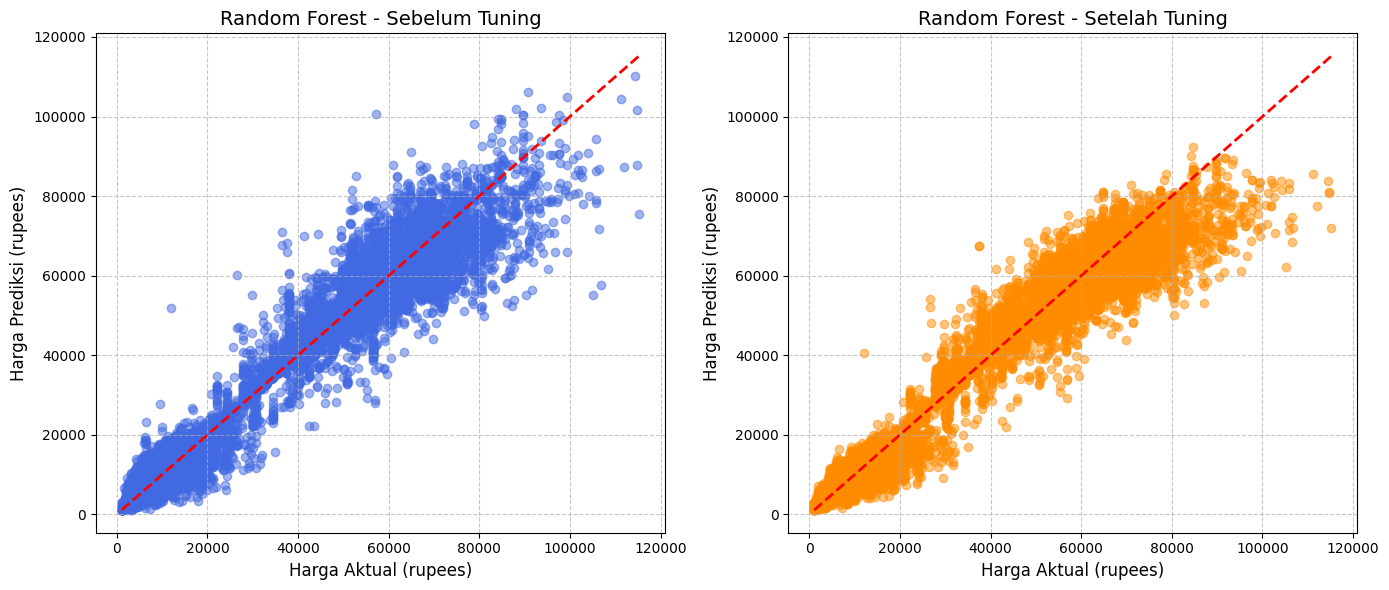

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# --- Sebelum Tuning ---
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_test_rf, alpha=0.5, color="royalblue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.title("Random Forest - Sebelum Tuning", fontsize=14)
plt.xlabel("Harga Aktual (rupees)", fontsize=12)
plt.ylabel("Harga Prediksi (rupees)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# --- Setelah Tuning ---
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha=0.5, color="darkorange")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.title("Random Forest - Setelah Tuning", fontsize=14)
plt.xlabel("Harga Aktual (rupees)", fontsize=12)
plt.ylabel("Harga Prediksi (rupees)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Garis merah putus-putus = prediksi ideal (harga prediksi = harga aktual).

Titik biru = hasil prediksi Random Forest.
- Mayoritas titik biru rapat di sekitar garis merah  artinya model cukup akurat dalam memprediksi harga tiket.

- Model sedikit kesulitan memprediksi tiket yang sangat mahal, sehingga error lebih besar di bagian ini (wajar, karena RMSE lebih sensitif ke outlier tiket mahal).

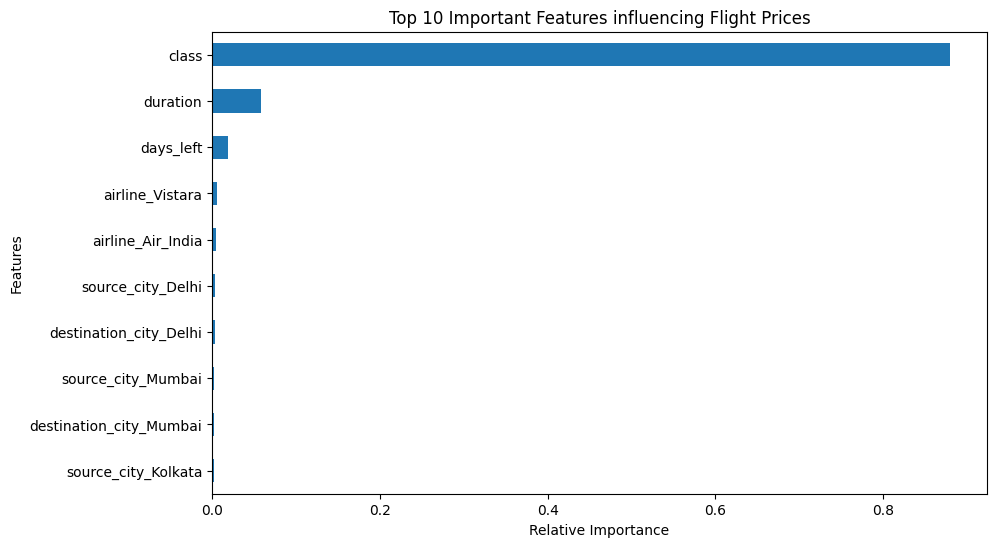

In [ ]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features influencing Flight Prices')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

- Faktor paling dominan memengaruhi harga tiket adalah kelas penerbangan (class), diikuti oleh durasi perjalanan (duration) dan jarak waktu pembelian terhadap keberangkatan (days_left).
- Faktor lain seperti maskapai (airline) dan kota asal/tujuan juga berpengaruh, tapi relatif kecil.

## Conclusions

- Hasil analisis menunjukkan bahwa Random Forest merupakan model terbaik karena mampu memberikan prediksi harga tiket yang paling akurat, stabil, dan dengan tingkat kesalahan yang rendah.
- Faktor utama yang memengaruhi harga adalah kelas penerbangan, durasi, dan waktu pembelian.

## Recommendation
- Revenue Growth : Menerapkan dynamic pricing berbasis kelas, durasi, dan timing pembelian untuk memaksimalkan pendapatan.

- Operational Efficiency : Mengoptimalkan load factor agar kursi kosong berkurang dan profitabilitas meningkat.

- Customer Loyalty : Menggunakan prediksi harga untuk personalisasi promosi sehingga meningkatkan retensi dan value pelanggan.